In [125]:
#load dataset
import pandas as pd

train = pd.read_csv("./Kaggle_random/train.csv")
test = pd.read_csv("./Kaggle_random/test.csv")

train.dropna(inplace=True)

train_x = train.x.values
train_y = train.y.values

False

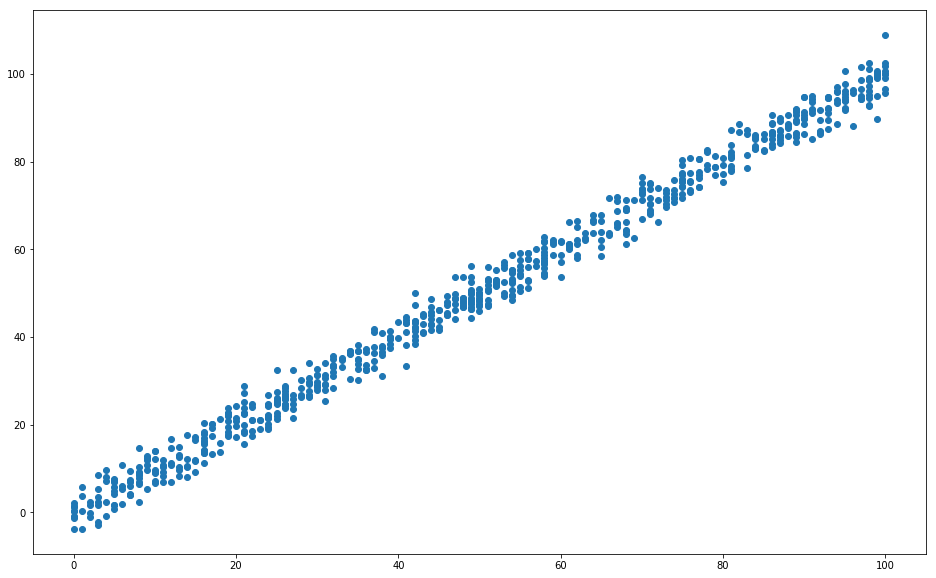

In [107]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 10)

plt.scatter(train_x, train_y)
plt.show()

In [108]:
import tensorflow as tf

In [136]:
m0 = tf.Variable(0.)
m1 = tf.Variable(0.)

epochs = 200000

y = m1*train_x+m0

loss = tf.reduce_mean(tf.square(y-train_y))

optimizer = tf.train.GradientDescentOptimizer(0.0001)
train = optimizer.minimize(loss)
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    train_data = []
    for steps in range(epochs):
        evals = sess.run([train,m1,m0])[1:]
        if steps%5000==0:
            print ('step {} of {} completed, current values = {}'.format(steps, epochs, evals))
            train_data.append(evals)

step 0 of 200000 completed, current values = [0.6670849, 0.009987975]
step 5000 of 200000 completed, current values = [0.9992313, -0.012144731]
step 10000 of 200000 completed, current values = [0.9995473, -0.033237506]
step 15000 of 200000 completed, current values = [0.99979323, -0.049652856]
step 20000 of 200000 completed, current values = [0.9999846, -0.06242823]
step 25000 of 200000 completed, current values = [1.0001335, -0.07237008]
step 30000 of 200000 completed, current values = [1.0002495, -0.080107234]
step 35000 of 200000 completed, current values = [1.0003397, -0.08612862]
step 40000 of 200000 completed, current values = [1.0004098, -0.0908147]
step 45000 of 200000 completed, current values = [1.0004646, -0.09446156]
step 50000 of 200000 completed, current values = [1.000507, -0.097299516]
step 55000 of 200000 completed, current values = [1.0005401, -0.09950824]
step 60000 of 200000 completed, current values = [1.0005659, -0.101227514]
step 65000 of 200000 completed, curren

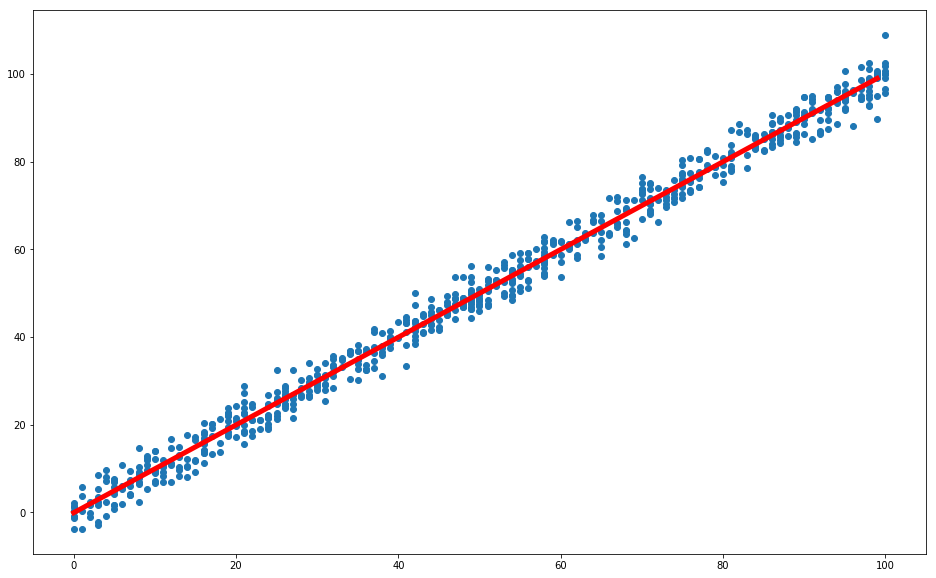

In [137]:
plt.scatter(train_x, train_y)

import numpy as np

#predicted line
xs = np.arange(0,100,1)
ys = train_data[-1][0]*xs + train_data[-1][1]
plt.plot(xs, ys, c='r', lw=5.0)
plt.legend()
plt.show()

In [138]:
def predict(data):
    m = train_data[-1][0]
    b = train_data[-1][1]
    
    return data*m+b

In [139]:
from sklearn.metrics import explained_variance_score
explained_variance_score(predict(test.x.values), test.y.values)

0.9885109805107366

In [140]:
from sklearn.metrics import r2_score
r2_score(predict(test.x.values), test.y.values)

0.9883665629177725